In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Schelling:
    def __init__(self, Nx, Ny, p):
        self.Nx, self.Ny = Nx, Ny
        self.p = p  # Happiness threshold
        choices = [-1, 0, 1]  # Two agent types (-1, 1) and empty spaces (0)
        probs = [0.45, 0.1, 0.45]  # 10% of one type, 45% empty, 45% another type
        self.space = np.random.choice(choices, (self.Nx, self.Ny), p=probs)

    def vacant_pos(self):
        x_vacant, y_vacant = np.where(self.space == 0)  # Find unoccupied cells
        return list(zip(x_vacant, y_vacant))  # Convert to a list of tuples

    def happiness(self):
        unhappy = []

        for j in range(self.Ny):
            for i in range(self.Nx):
                if self.space[j, i] == 0:  # Skip empty cells
                    continue

                same_neighbors = 0
                tot_neighbors = 0
                neighbors = [
                    ((j - 1) % self.Ny, i),  # Top
                    ((j + 1) % self.Ny, i),  # Bottom
                    (j, (i - 1) % self.Nx),  # Left
                    (j, (i + 1) % self.Nx),  # Right
                    ((j - 1) % self.Ny, (i - 1) % self.Nx),  # Upper Left
                    ((j - 1) % self.Ny, (i + 1) % self.Nx),  # Upper Right
                    ((j + 1) % self.Ny, (i - 1) % self.Nx),  # Bottom Left
                    ((j + 1) % self.Ny, (i + 1) % self.Nx),  # Bottom Right
                ]

                for y, x in neighbors:
                    if self.space[y, x] != 0:  
                        tot_neighbors += 1
                        if self.space[y, x] == self.space[j, i]:
                            same_neighbors += 1

                if tot_neighbors > 0:  # Avoid division by zero
                    happiness_score = same_neighbors / tot_neighbors
                    if happiness_score < self.p:  # If below threshold, it's unhappy
                        unhappy.append((j, i))

        return unhappy
    
    def ave_happiness(self):
        same_neighbors = 0
        tot_neighbors = 0
        tot_happiness = []

        for j in range(self.Ny):
            for i in range(self.Nx):
                if self.space[j, i] == 0:  # Skip empty cells
                    continue

                neighbors = [
                    ((j - 1) % self.Ny, i),  # Top
                    ((j + 1) % self.Ny, i),  # Bottom
                    (j, (i - 1) % self.Nx),  # Left
                    (j, (i + 1) % self.Nx),  # Right
                    ((j - 1) % self.Ny, (i - 1) % self.Nx),  # Upper Left
                    ((j - 1) % self.Ny, (i + 1) % self.Nx),  # Upper Right
                    ((j + 1) % self.Ny, (i - 1) % self.Nx),  # Bottom Left
                    ((j + 1) % self.Ny, (i + 1) % self.Nx),  # Bottom Right
                ]

                for y, x in neighbors:
                    if self.space[y, x] != 0:
                        tot_neighbors += 1
                        if self.space[y, x] == self.space[j, i]:
                            same_neighbors += 1
                            
                if tot_neighbors > 0:  # Avoid division by zero
                    happiness_score = same_neighbors / tot_neighbors
                    tot_happiness.append(happiness_score)

        return (np.sum(tot_happiness)/len(tot_happiness))


    def move_unhappy(self):
        unhappy_cells = self.happiness()
        vacant_cells = self.vacant_pos()

        np.random.shuffle(vacant_cells)  # Shuffle vacant spots for randomness

        for j, i in unhappy_cells:
            if vacant_cells:
                new_j, new_i = vacant_cells.pop()  # Take a random vacant spot

                self.space[new_j, new_i] = self.space[j, i]  # Move agent
                self.space[j, i] = 0  # Mark old position as empty

    def simulate(self, max_steps=100):
        segregation_levels = []
        for step in range(max_steps):
            self.move_unhappy()  # Move unhappy agents
            segregation_levels.append(self.ave_happiness())  # Track segregation
        
        return segregation_levels  # Return segregation data for plotting

    def plot_grid(self):
        plt.imshow(self.space, cmap="bwr", vmin=-1, vmax=1)
        plt.colorbar(ticks=[-1, 0, 1], label="Agent Type")
        plt.title(f"Schelling Model Simulation (p={self.p})")
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.show()


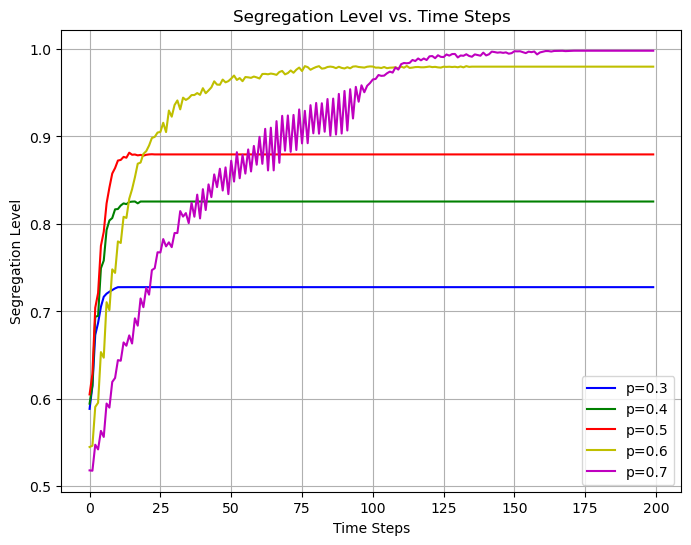

In [3]:
# Set parameters
grid_size = 50
time_steps = 200
p_values = [0.3,0.4, 0.5, 0.6, 0.7]  # Different tolerance thresholds
colors = ['b', 'g', 'r', 'y', 'm']

# Run simulations and collect data
plt.figure(figsize=(8, 6))
for p, color in zip(p_values, colors):
    model = Schelling(grid_size, grid_size, p)
    segregation_levels = model.simulate(time_steps)
    plt.plot(range(time_steps), segregation_levels, label=f"p={p}", color=color)

# Plot formatting
plt.xlabel("Time Steps")
plt.ylabel("Segregation Level")
plt.title("Segregation Level vs. Time Steps")
plt.legend()
plt.grid(True)
plt.savefig('segregationvstimestep.png', bbox_inches = 'tight')